In [1]:
## Loading packages
from six.moves import urllib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import os
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
print('Done!')
from sklearn.decomposition import PCA
from scipy.io import loadmat


Done!


In [2]:
#!pip install --upgrade pip
#!pip install sklearn-som

In [3]:
##Loading data and normalizing
X=np.load('inp_alfalfa.npy')  # load the input
Y=np.load('tar_alfalfa.npy')  # load the target

print ('Done!')



Done!


In [4]:
print(np.shape(X),np.shape(Y)) #Check the size and dimension of the input and the target


(13674, 15) (13674,)


In [5]:
from sklearn.model_selection import train_test_split

X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.25 )

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

training set ==  (10255, 15) (10255,) ,, validation set ==  (3419, 15) (3419,)


In [6]:
#Line #1: Import a model, for normalization, like StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#Line #2: fitting (finding the parameters of the model based on the training set). Assign a name (scaler_S which can transform a new data after training)

#Line #3: Predicted (transformed) values for the training set

#Line #4: Predicted (transformed) values for the validation set (using the model that has been trained using the training set).


 

scaler_S= MinMaxScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

print('Done!')

Done!


In [7]:
Do_PCA=0

if Do_PCA:
    pca=PCA(.9)

    # fit 
    pca.fit(X_tr_Norm)

    # predict 

    X_tr_Norm = pca.transform(X_tr_Norm)
    X_va_Norm = pca.transform(X_va_Norm)
    print('PCA done')

In [8]:
from sklearn.cluster import KMeans

##Choose the number of clusters  in the Kmean method


K=2

kmeans = KMeans(n_clusters=K,max_iter=5000)

# fit the data
kmeans.fit(X_tr_Norm)

# predict
Kmean_pred_tr=kmeans.predict(X_tr_Norm)
Kmean_pred_va=kmeans.predict(X_va_Norm)

In [9]:
Kmean_pred_tr


array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

(2, 15)


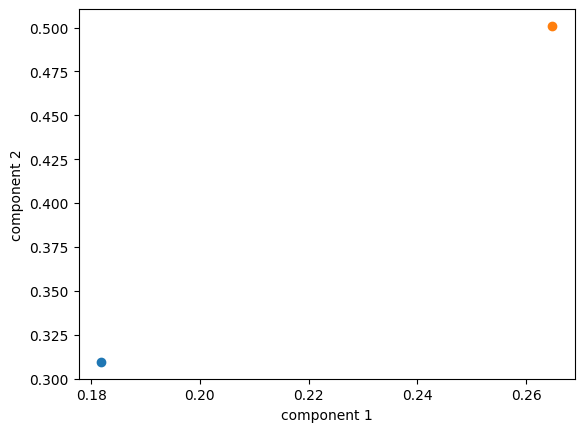

In [10]:
# show the center of the cluster in the two dimention plot (of the selected components):

#choose the two components of PCA
comp_x = 1
comp_y = 2




for k1 in range(K):
  plt.plot(kmeans.cluster_centers_[k1,comp_x],kmeans.cluster_centers_[k1,comp_y],'o')
plt.xlabel('component '+str(comp_x))
plt.ylabel('component '+str(comp_y))

print (np.shape(kmeans.cluster_centers_))

Text(0, 0.5, 'Y')

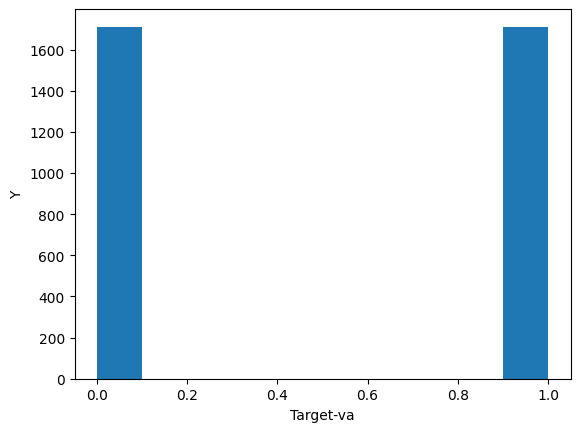

In [11]:
plt.hist(Y_va)
plt.xlabel('Target-va')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

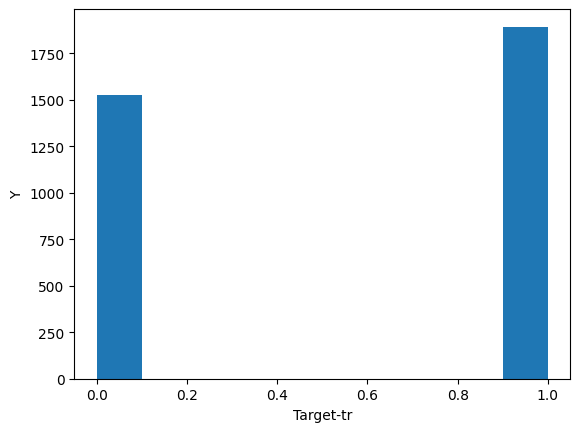

In [12]:
plt.hist(Kmean_pred_va)
plt.xlabel('Target-tr')
plt.ylabel('Y')

In [13]:
Y_va

array([0., 0., 0., ..., 1., 0., 0.])

In [14]:
Kmean_pred_va

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [15]:
n_correct=0
for k1 in range(len(Y_va)):
    if Kmean_pred_va[k1]==Y_va[k1]:n_correct +=1

print (n_correct/len(Y_va))

0.6127522667446622


In [16]:
n_correct=0
for k1 in range(len(Y_tr)):
    if Kmean_pred_tr[k1]==Y_tr[k1]:n_correct +=1

print (n_correct/len(Y_tr))

0.6096538274012677
